<a href="https://colab.research.google.com/github/apremlani/business_solution/blob/main/Pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
! unzip /content/drive/MyDrive/ColabNotebooks/chest-xray.zip -d /content/drive/MyDrive/ColabNotebooks/chest-xray

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/tra

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
path = '/content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray'

In [ ]:
data =  ImageDataLoaders.from_folder(
    path,
    train = '.',
    valid_pct = 0.2,
    seed = 42,
    item_tfms=Resize(224)
)

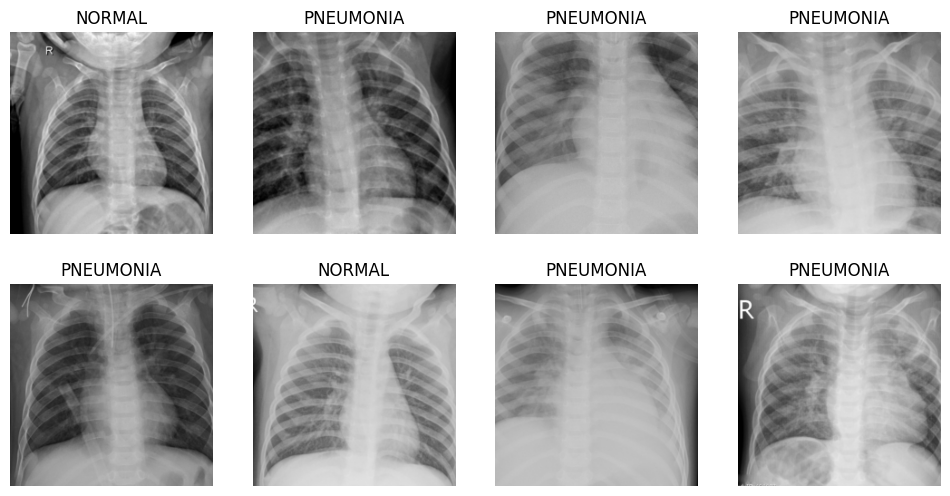

In [ ]:
data.show_batch(max_n=8)

In [ ]:
learn = vision_learner(data, models.resnet50, metrics = [accuracy], model_dir = Path('Path'), path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 196MB/s]


SuggestedLRs(valley=0.0008317637839354575)

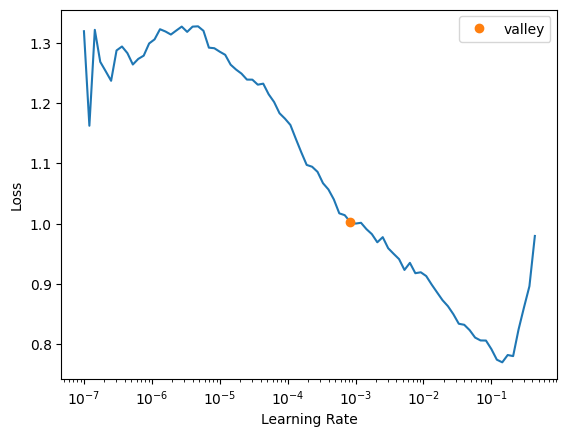

In [ ]:
learn.lr_find()

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.583236,0.298682,0.947908,04:42
1,0.309942,0.330140,0.941076,04:36
2,0.142726,0.087933,0.969257,04:39
3,0.084862,0.069085,0.977370,04:37


In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)

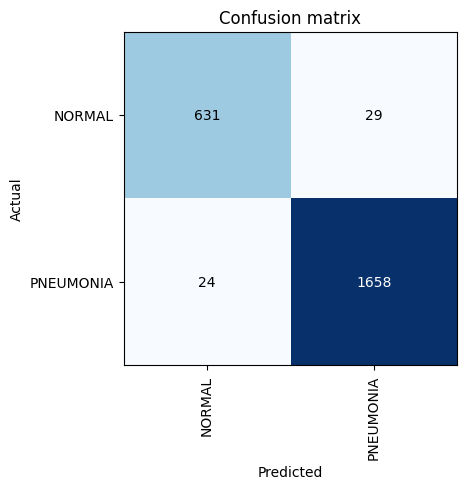

In [ ]:
interpret.plot_confusion_matrix()

In [ ]:
img = PILImage.create('/content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/test/NORMAL/IM-0025-0001.jpeg')

<Axes: >

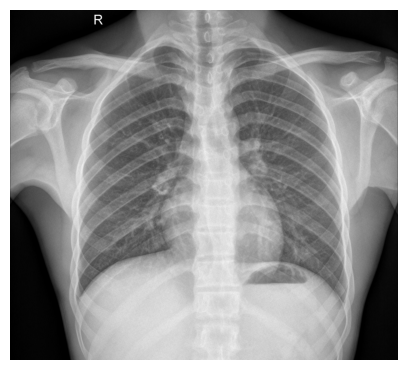

In [ ]:
img.show()

In [ ]:
print(learn.predict(img)[0])

NORMAL


In [ ]:
img = PILImage.create('/content/drive/MyDrive/ColabNotebooks/chest-xray/chest_xray/test/PNEUMONIA/person1610_virus_2793.jpeg')

<Axes: >

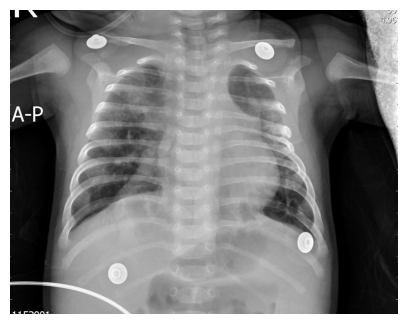

In [ ]:
img.show()

In [ ]:
print(learn.predict(img)[0])

PNEUMONIA
